# Electric Vehicle Analysis and Prediction

![Electric Vehicles](electric_vehicles.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Preview Data

`Note`: Electric Vehicle (EV) Specifications 2025

In [2]:
df = pd.read_csv('electric_vehicles_2025.csv')

In [3]:
df.shape

(478, 22)

In [4]:
df.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'battery_type', 'number_of_cells', 'torque_nm', 'efficiency_wh_per_km',
       'range_km', 'acceleration_0_100_s', 'fast_charging_power_kw_dc',
       'fast_charge_port', 'towing_capacity_kg', 'cargo_volume_l', 'seats',
       'drivetrain', 'segment', 'length_mm', 'width_mm', 'height_mm',
       'car_body_type', 'source_url'],
      dtype='object')

### Feature Descriptions (Column Explanations)
|Column Name | Description |
|-------------|---------------|
| top_speed_kmh | Top speed of the vehicle in kilometres per hour -> performance capability |
| battery_capability_kWh | Battery size in kilowatt-hours. Larger batteries -> longer range |
| battery_type | Technology of the battery (e.g. Lithium-ion) -> charging, lifespan and energy density |
| number_of_cells | Number of individual battery cells inside the battery pack -> battery capacity and layout |
| torque_nm | Torque output in Newton-meters -> acceleration and towing capability |
| efficiency_wh_per_km | Energy consumption in watt-hours per kilometer. Lower values = higher energy efficiency |
| range_km | Maximum range the EV can travel on a full charge |
| acceleration_0_100_s | Time (in seconds) the EV takes to accelerate from 0 to 100 km/h. Lower values = faster cars |
| fast_charging_power_kw_dc | Maximum power (in kW) that the vehicle can receive when using a DC fast charger |
| fast_charge_port | Type of fast charging port (e.g. CCS, CHAdeMO) -> compatibility with charging infrastructure |
| towing_capacity_kg | Maximum weight (in kg) the vehicle can tow. Often missing in small EVs |
|cargo_volumn_l | Available cargo space in liters -> practicality and storage |
| seats | Number of passenger seats in the vehicle |
| drivetrain | Drivetrain layout (e.g. FWD = Front-Wheel Drive, RWD = Rear, AWD = All-Wheel Drive) -> traction and handling
| segment | Market segment classification (e.g. B - Compact, C - Medium SUV) |
| length_mm | Vehicle length in milimeters |
| width_mm | Vehicle width in milimeters |
| height_mm | Vehicle height in milimeters |
| car_body_type | Body configuration (e.g. SUV, Hatchback, Sedan, Coupe) = design and usability |


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [6]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [7]:
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


In [8]:
df.nunique()

brand                         59
model                        477
top_speed_kmh                 38
battery_capacity_kWh         121
battery_type                   1
number_of_cells               38
torque_nm                    128
efficiency_wh_per_km         112
range_km                      88
acceleration_0_100_s          97
fast_charging_power_kw_dc     71
fast_charge_port               2
towing_capacity_kg            26
cargo_volume_l               140
seats                          7
drivetrain                     3
segment                       15
length_mm                    172
width_mm                     108
height_mm                    162
car_body_type                  8
source_url                   478
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
top_speed_kmh,478.0,185.487448,34.252773,125.0,160.0,180.00,201.00,325.0
battery_capacity_kWh,478.0,74.043724,20.331058,21.3,60.0,76.15,90.60,118.0
number_of_cells,276.0,485.293478,1210.819733,72.0,150.0,216.00,324.00,7920.0
torque_nm,471.0,498.012739,241.461128,113.0,305.0,430.00,679.00,1350.0
efficiency_wh_per_km,478.0,162.903766,34.317532,109.0,143.0,155.00,177.75,370.0
range_km,478.0,393.179916,103.287335,135.0,320.0,397.50,470.00,685.0
acceleration_0_100_s,478.0,6.882636,2.730696,2.2,4.8,6.60,8.20,19.1
fast_charging_power_kw_dc,477.0,125.008386,58.205012,29.0,80.0,113.00,150.00,281.0
towing_capacity_kg,452.0,1052.261062,737.851774,0.0,500.0,1000.00,1600.00,2500.0
seats,478.0,5.263598,1.003961,2.0,5.0,5.00,5.00,9.0


In [10]:
df.describe(include='object').T

,count,unique,top,freq
brand,478,59,Mercedes-Benz,42
model,477,477,500e Convertible,1
battery_type,478,1,Lithium-ion,478
fast_charge_port,477,2,CCS,476
cargo_volume_l,477,140,520,17
drivetrain,478,3,AWD,191
segment,478,15,JC - Medium,91
car_body_type,478,8,SUV,244
source_url,478,478,https://ev-database.org/car/1904/Abarth-500e-C...,1


# 2. Exploratory Data Analysis

## Preprocessing data

In [11]:
df['cargo_volume_l'].unique()


array(['185', '360', '496', '472', '400', '326', '502', '520', '535',
       '526', '511', '10 Banana Boxes', '514', '350', '405', '470', '490',
       '570', '500', '525', '440', '345', '308', '552', '235', '385',
       '540', '793', '775', '1050', '310', '460', '380', '510', '603',
       '989', '390', '620', '467', '361', '572', '536', '519', '523', nan,
       '672', '228', '333', '354', '432', '503', '438', '280', '480',
       '401', '338', '466', '505', '355', '550', '839', '435', '475',
       '309', '210', '522', '316', '611', '509', '456', '410', '249',
       '363', '479', '453', '448', '151', '270', '31 Banana Boxes', '340',
       '495', '430', '645', '13 Banana Boxes', '828', '551', '1410',
       '1030', '555', '1390', '990', '300', '200', '579', '265', '386',
       '450', '468', '415', '819', '352', '516', '267', '434', '588',
       '412', '608', '471', '348', '407', '484', '446', '366', '367',
       '420', '950', '545', '585', '313', '323', '370', '630', '441',
   

In [12]:
#convert 'cargo_volume_l' to numeric 
def convert_cargo_volume(value):
    try:
        s = str(value)
        if 'Banana' in s:
            return int(s.split(' Banana')[0]) * 42 # 01 banana box = 42l
        else: 
            return int(s)
    except (ValueError, TypeError):
        return np.nan

df['cargo_volume_corrected'] = df['cargo_volume_l'].apply(lambda x: convert_cargo_volume(x))


In [13]:
df['cargo_volume_corrected'].unique()

array([ 185.,  360.,  496.,  472.,  400.,  326.,  502.,  520.,  535.,
        526.,  511.,  420.,  514.,  350.,  405.,  470.,  490.,  570.,
        500.,  525.,  440.,  345.,  308.,  552.,  235.,  385.,  540.,
        793.,  775., 1050.,  310.,  460.,  380.,  510.,  603.,  989.,
        390.,  620.,  467.,  361.,  572.,  536.,  519.,  523.,   nan,
        672.,  228.,  333.,  354.,  432.,  503.,  438.,  280.,  480.,
        401.,  338.,  466.,  505.,  355.,  550.,  839.,  435.,  475.,
        309.,  210.,  522.,  316.,  611.,  509.,  456.,  410.,  249.,
        363.,  479.,  453.,  448.,  151.,  270., 1302.,  340.,  495.,
        430.,  645.,  546.,  828.,  551., 1410., 1030.,  555., 1390.,
        990.,  300.,  200.,  579.,  265.,  386.,  450.,  468.,  415.,
        819.,  352.,  516.,  267.,  434.,  588.,  412.,  608.,  471.,
        348.,  407.,  484.,  446.,  366.,  367.,  950.,  545.,  585.,
        313.,  323.,  370.,  630.,  441.,  594.,  709.,  425.,  854.,
        452.,  376.,

In [14]:
df['segment'].unique()

array(['B - Compact', 'JB - Compact', 'JC - Medium', 'JE - Executive',
       'JD - Large', 'F - Luxury', 'D - Large', 'E - Executive',
       'C - Medium', 'JF - Luxury', 'N - Passenger Van', 'A - Mini',
       'JA - Mini', 'G - Sports', 'I - Luxury'], dtype=object)

In [15]:
#Group the 'segment' variables
df['segment_group'] = df['segment'].apply(
    lambda x: str(x).split(' - ')[1] if ' - ' in str(x) else np.nan
)

df['segment_group'].value_counts(dropna=False)

segment_group
Medium           125
Large             86
Luxury            82
Compact           73
Executive         58
Passenger Van     47
Mini               5
Sports             2
Name: count, dtype: int64

In [16]:
num_cols = [
    'top_speed_kmh',
    'battery_capacity_kWh',
    'number_of_cells',
    'torque_nm',
    'efficiency_wh_per_km',
    'range_km',
    'acceleration_0_100_s',
    'fast_charging_power_kw_dc',
    'towing_capacity_kg',
    'cargo_volume_corrected',
    'seats',
    'length_mm',
    'width_mm',
    'height_mm'    
]
cat_cols = [
    'brand',
    'model',
    'fast_charge_port',
    'drivetrain',
    'segment_group',
    'car_body_type'
]

In [17]:
#Fill numeric columns with their mean values
df[num_cols] = df[num_cols].apply(lambda col: col.fillna(col.mean())).round(0)

#fill categorical columns with 'Unknown'
df[cat_cols] = df[cat_cols].fillna('Unknown')

In [18]:
data = df.drop(['cargo_volume_l','segment','battery_type', 'source_url'], axis=1)
data.isnull().sum()

brand                        0
model                        0
top_speed_kmh                0
battery_capacity_kWh         0
number_of_cells              0
torque_nm                    0
efficiency_wh_per_km         0
range_km                     0
acceleration_0_100_s         0
fast_charging_power_kw_dc    0
fast_charge_port             0
towing_capacity_kg           0
seats                        0
drivetrain                   0
length_mm                    0
width_mm                     0
height_mm                    0
car_body_type                0
cargo_volume_corrected       0
segment_group                0
dtype: int64

## Visualizing top brands by unique models

In [19]:
#Group and count unique models by brands and body type
model_counts = (
    data.groupby(['brand', 'car_body_type'])['model']
        .nunique()
        .reset_index(name='unique_model_count')
)

#Pivot the data
pivot_table = model_counts.pivot_table(index='brand', columns='car_body_type', values='unique_model_count')

#Add totals for rows and columns
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.loc['Total'] = pivot_table.sum(axis=0)

print(pivot_table)


car_body_type  Cabriolet  Coupe  Hatchback  Liftback Sedan    SUV  Sedan  \
brand                                                                      
Abarth               NaN    NaN        2.0             NaN    2.0    NaN   
Aiways               NaN    NaN        NaN             NaN    2.0    NaN   
Alfa                 NaN    NaN        NaN             NaN    2.0    NaN   
Alpine               NaN    NaN        2.0             NaN    NaN    NaN   
Audi                 NaN    NaN        NaN             4.0   16.0    4.0   
BMW                  NaN    NaN        NaN             4.0    7.0    6.0   
BYD                  NaN    NaN        6.0             NaN    8.0    3.0   
CUPRA                NaN    NaN        3.0             NaN    2.0    NaN   
Cadillac             NaN    NaN        NaN             NaN    1.0    NaN   
Citroen              NaN    NaN        3.0             NaN    1.0    2.0   
DS                   NaN    NaN        1.0             NaN    4.0    NaN   
Dacia       

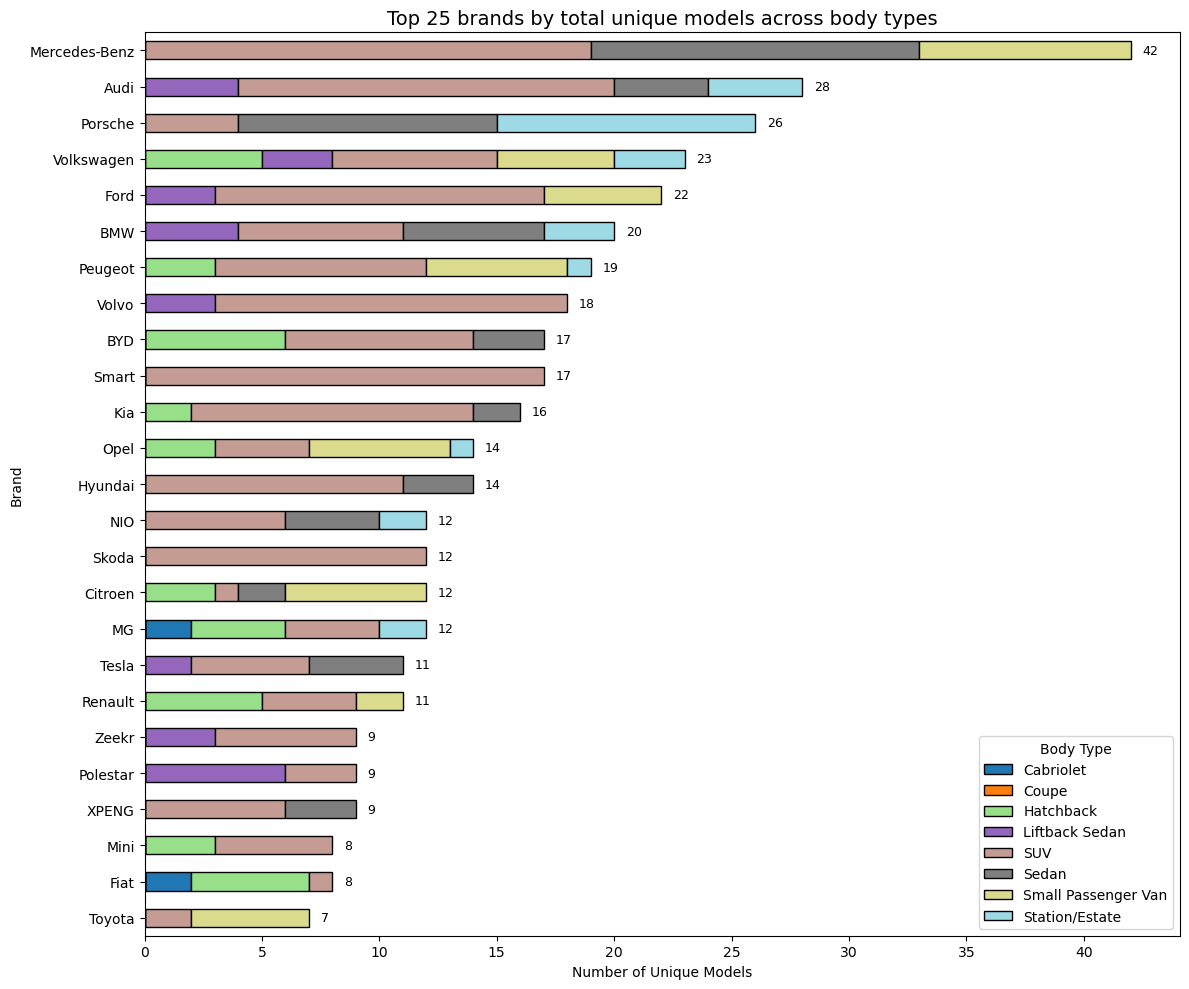

In [20]:
#Plot horizontal bar chart of top brands by unique models across bodytype
top_brands = (
    pivot_table.drop(index='Total', errors='ignore')
               .sort_values('Total', ascending=True)
               .tail(25) 
)
top_brands = top_brands.drop(['Total'], axis=1)


figure = top_brands.plot(
    kind='barh',
    stacked=True,
    figsize=(12,10),
    colormap='tab20',
    edgecolor='black'
)

#Add total value labels at the end of each bar
totals = top_brands.sum(axis=1)

for i, (brand, total) in enumerate(totals.items()):
    figure.text(
        total + 0.5,
        i,
        str(int(total)),
        va='center',
        fontsize=9,
        color='black'
    )

#Titles and labels
plt.title('Top 25 brands by total unique models across body types', fontsize=14)
plt.xlabel('Number of Unique Models')
plt.ylabel('Brand')
plt.legend(title='Body Type', loc='lower right')

plt.tight_layout()
plt.show()

In [21]:
#Group and count unique models by brands and segment groups
model_counts = (
    data.groupby(['brand', 'segment_group'])['model']
        .nunique()
        .reset_index(name='unique_model_count')
)

#Pivot the data
pivot_table = model_counts.pivot_table(index='brand', columns='segment_group', values='unique_model_count')

#Add totals for rows and columns
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.loc['Total'] = pivot_table.sum(axis=0)

print(pivot_table)

segment_group  Compact  Executive  Large  Luxury  Medium  Mini  Passenger Van  \
brand                                                                           
Abarth             4.0        NaN    NaN     NaN     NaN   NaN            NaN   
Aiways             NaN        NaN    NaN     NaN     2.0   NaN            NaN   
Alfa               2.0        NaN    NaN     NaN     NaN   NaN            NaN   
Alpine             2.0        NaN    NaN     NaN     NaN   NaN            NaN   
Audi               NaN        8.0    8.0     4.0     8.0   NaN            NaN   
BMW                NaN        9.0    4.0     3.0     4.0   NaN            NaN   
BYD                4.0        1.0    8.0     NaN     4.0   NaN            NaN   
CUPRA              NaN        NaN    NaN     NaN     5.0   NaN            NaN   
Cadillac           NaN        NaN    NaN     1.0     NaN   NaN            NaN   
Citroen            2.0        NaN    NaN     NaN     4.0   NaN            6.0   
DS                 1.0      

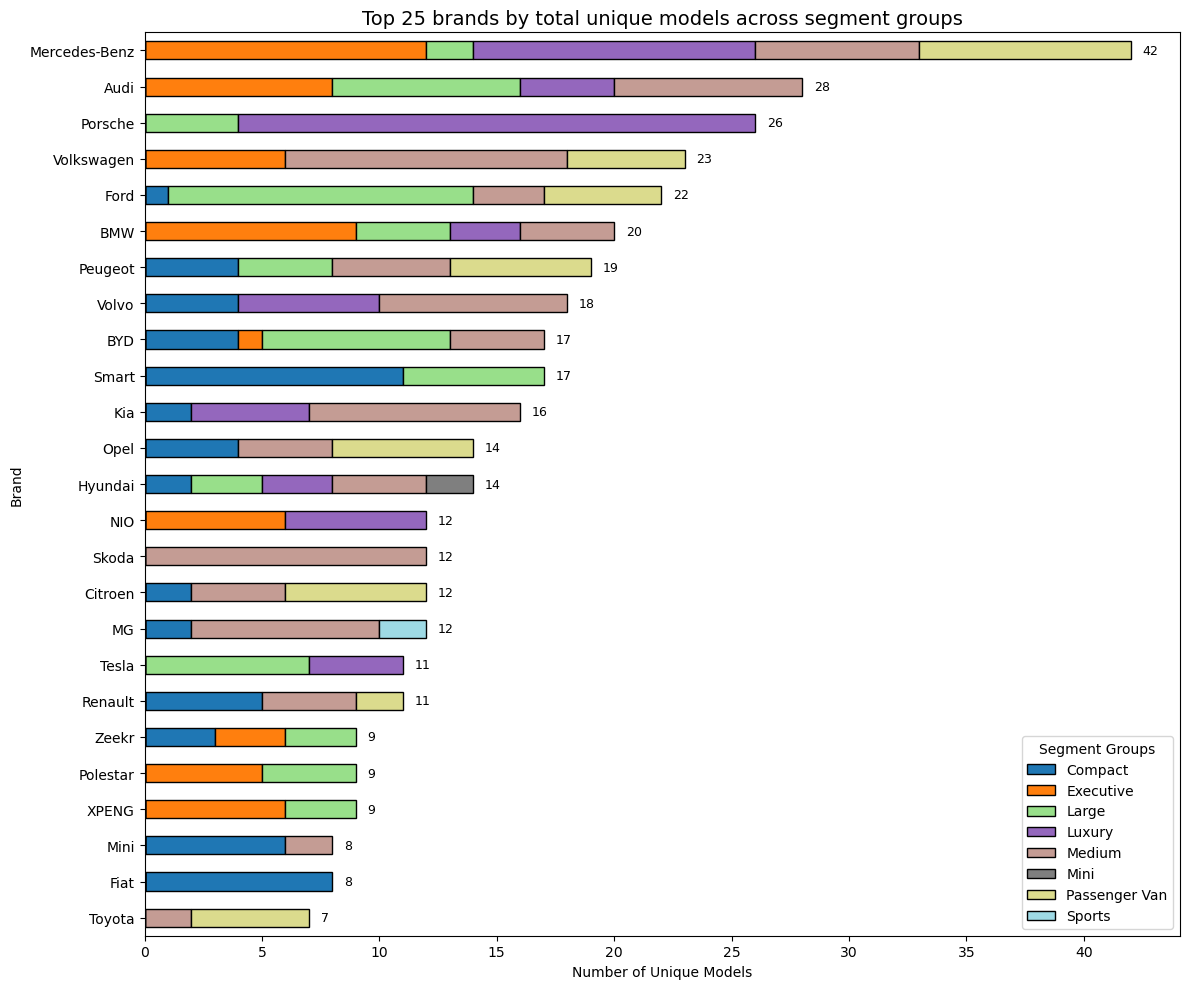

In [22]:
#Plot horizontal bar chart of top brands by unique models across segment groups
top_brands = (
    pivot_table.drop(index='Total', errors='ignore')
               .sort_values('Total', ascending=True)
               .tail(25) 
)
top_brands = top_brands.drop(['Total'], axis=1)


figure = top_brands.plot(
    kind='barh',
    stacked=True,
    figsize=(12,10),
    colormap='tab20',
    edgecolor='black'
)

#Add total value labels at the end of each bar
totals = top_brands.sum(axis=1)

for i, (brand, total) in enumerate(totals.items()):
    figure.text(
        total + 0.5,
        i,
        str(int(total)),
        va='center',
        fontsize=9,
        color='black'
    )

#Titles and labels
plt.title('Top 25 brands by total unique models across segment groups', fontsize=14)
plt.xlabel('Number of Unique Models')
plt.ylabel('Brand')
plt.legend(title='Segment Groups', loc='lower right')

plt.tight_layout()
plt.show()

## Correlation Heatmap

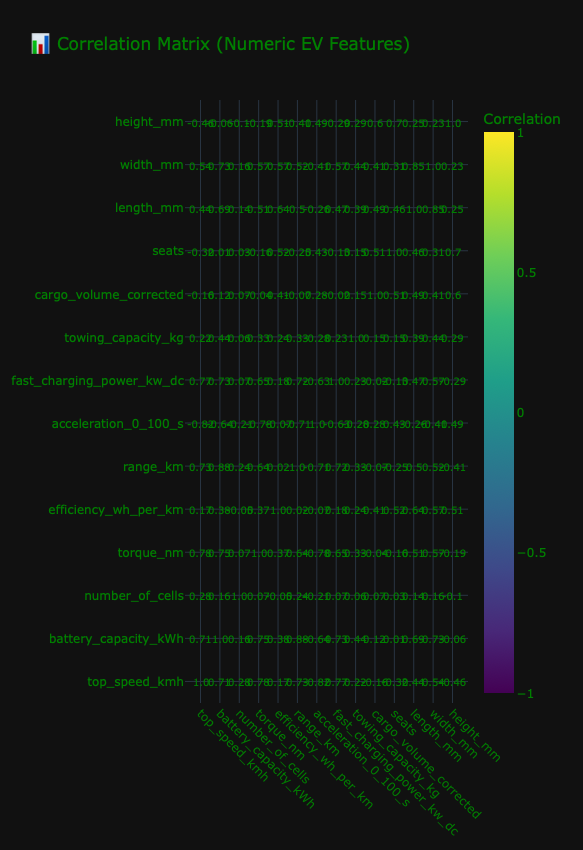

In [23]:
import plotly.graph_objects as go
#Compute correlation matrix
corr = data[num_cols].corr().round(2)

#Create heatmap
fig = go.Figure(
    data=go.Heatmap(
        x=corr.columns,
        y=corr.index,
        z=corr.values,
        colorscale='Viridis',
        zmin=-1,
        zmax=1,
        colorbar=dict(
            title=dict(text='Correlation', font=dict(color='green')),
            tickfont=dict(color='green')
        )
    )
)

#Add annotations (correlation values)
for i, row in enumerate(corr.index):
    for j, col in enumerate(corr.columns):
        fig.add_annotation(
            x=col,
            y=row,
            text=str(corr.iloc[i,j]),
            showarrow=False,
            font=dict(color='green', size=10)
        )

#Layout customization
fig.update_layout(
    title='📊 Correlation Matrix (Numeric EV Features)',
    title_font_color='green',
    template='plotly_dark',
    xaxis=dict(tickangle=45, tickfont=dict(color='green')),
    yaxis=dict(tickfont=dict(color='green')),
    width=850,
    height=850
)

#Show figure
fig.show()

`Notes`:
- High positive correlation: 'range_km' vs 'battery_capacity_kWh'
- High negative correlation: 'range_km' vs 'acceleration_0_100_s'

 ## Multivariate / Combined Visuals

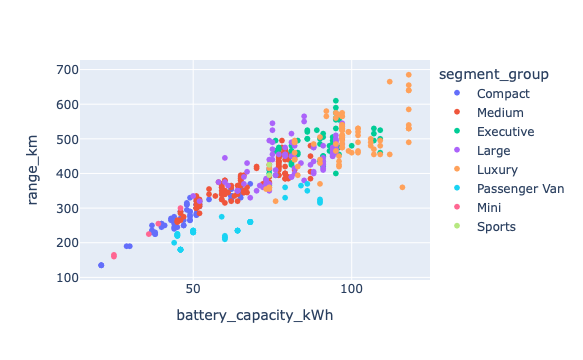

In [24]:
#battery capacity vs. range vs. segment_group
import plotly.express as px
fig = px.scatter(
    data,
    x='battery_capacity_kWh',
    y='range_km',
    color='segment_group'
)

fig.show()

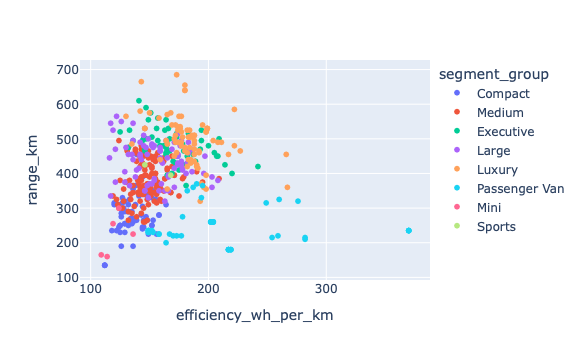

In [25]:
#battery capacity vs. range vs. segment_group

fig = px.scatter(
    data,
    x='efficiency_wh_per_km',
    y='range_km',
    color='segment_group'
)

fig.show()

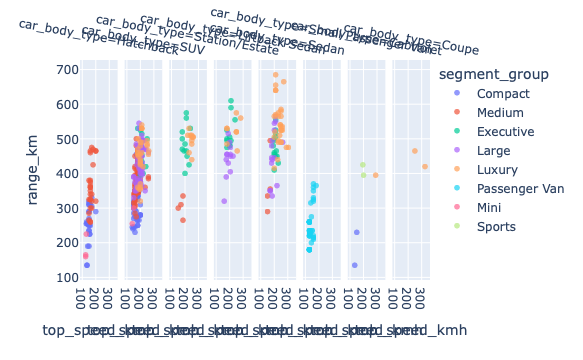

In [26]:
#top speed vs. range vs. segment_group
fig = px.scatter(
    data,
    x='top_speed_kmh',
    y='range_km',
    color='segment_group',
    facet_col='car_body_type',
    opacity=0.7
)

fig.for_each_annotation(lambda a: a.update(textangle=10))

fig.show()

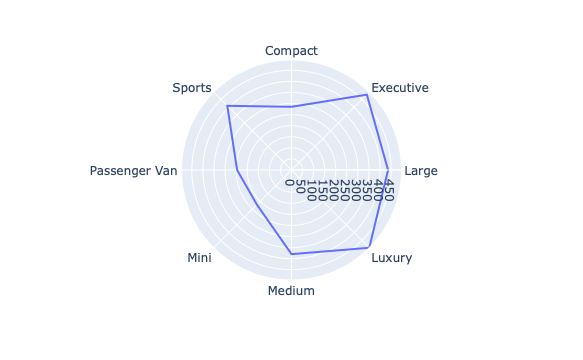

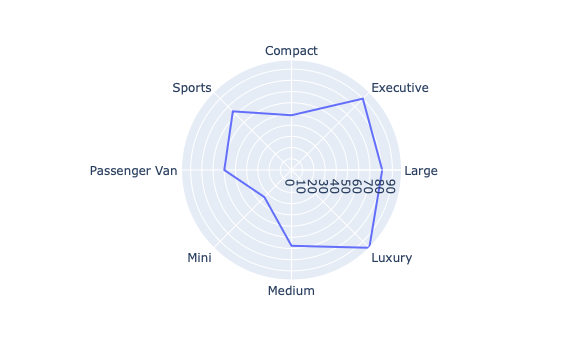

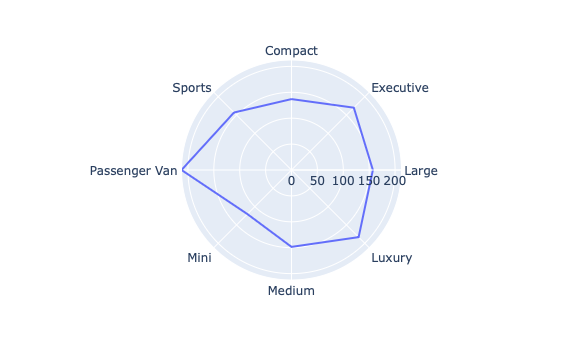

In [27]:
#Compare normalized performance profiles of different segment_groups
segment_means = data.groupby('segment_group')[['range_km', 'top_speed_kmh', 
                                             'acceleration_0_100_s', 'battery_capacity_kWh', 
                                             'efficiency_wh_per_km']].mean().reset_index()

fig = px.line_polar(segment_means, r='range_km', theta='segment_group', line_close=True)
fig.show()
fig = px.line_polar(segment_means, r='battery_capacity_kWh', theta='segment_group', line_close=True)
fig.show()
fig = px.line_polar(segment_means, r='efficiency_wh_per_km', theta='segment_group', line_close=True)
fig.show()

# 3. Machine learning model to predict the EV range

## Preprocessing

In [28]:
data.columns

Index(['brand', 'model', 'top_speed_kmh', 'battery_capacity_kWh',
       'number_of_cells', 'torque_nm', 'efficiency_wh_per_km', 'range_km',
       'acceleration_0_100_s', 'fast_charging_power_kw_dc', 'fast_charge_port',
       'towing_capacity_kg', 'seats', 'drivetrain', 'length_mm', 'width_mm',
       'height_mm', 'car_body_type', 'cargo_volume_corrected',
       'segment_group'],
      dtype='object')

In [29]:
X = data.drop('range_km', axis=1)
y = data['range_km']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
num_cols_except_target = [col for col in num_cols if col != 'range_km']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols_except_target),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=869
)

## Model definition

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=537),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=537),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=537),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=537),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

## Model Training, Prediction and Evaluation

In [33]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

#Create model evaluation loop
results = []

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results.append({
        'Model': name,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R² Score': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='RMSE', ascending=True)
results_df

,Model,RMSE,R² Score
1,Ridge Regression,17.927764,0.969934
0,Linear Regression,18.015952,0.969637
4,Gradient Boosting,18.018612,0.969629
3,Random Forest,18.905303,0.966566
2,Lasso Regression,19.077602,0.965954
6,Extra Trees,19.212211,0.965471
5,AdaBoost,26.737026,0.933127
8,K-Nearest Neighbors,37.525408,0.868273
7,Support Vector Regressor,86.955182,0.292683


## Best model visualization

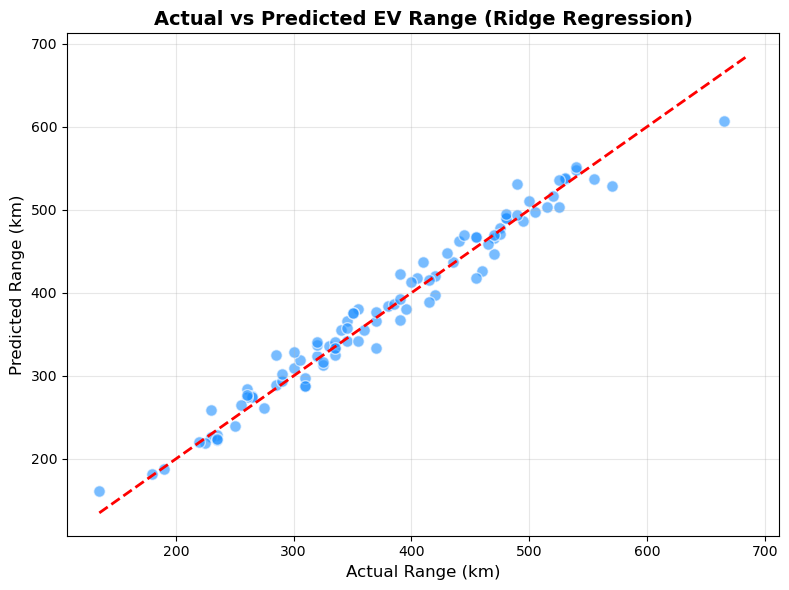

In [34]:
#Fit Ridge model in a pipeline 
best_model = make_pipeline(preprocessor, Ridge())
best_model.fit(X_train, y_train)

#Predict on the test set
y_pred = best_model.predict(X_test)

#Visualization: Actual and predicted Range
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolor='white', s=70)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)

plt.title("Actual vs Predicted EV Range (Ridge Regression)", fontsize=14, weight='bold')
plt.xlabel("Actual Range (km)", fontsize=12)
plt.ylabel("Predicted Range (km)", fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 4. EV Market Segmentation: Factor + Cluster Analysis

In [35]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from IPython.display import display, HTML

### Bartlett's Test

In [36]:
# Bartlett's Test (Check correlation adequacy)
chi_square, p_value = calculate_bartlett_sphericity(data[num_cols])

from IPython.display import Markdown, display

md = f'''
**Bartlett’s Test**

- **Chi-square:** {chi_square:.2f}  
- **P-value:** {p_value:.5f}  

> p < 0.05 → variables are sufficiently correlated for Factor Analysis.
'''
display(Markdown(md))


**Bartlett’s Test**

- **Chi-square:** 6716.45  
- **P-value:** 0.00000  

> p < 0.05 → variables are sufficiently correlated for Factor Analysis.


### KMO Test

In [37]:
#KMO Test (Measure sampling adequacy)
kmo_all, kmo_model = calculate_kmo(data[num_cols])

md = f'''
**KMO Measure**
- **Overall KMO:** {kmo_model:.3f}
> ✅ A KMO value > 0.7 indicates that your data is suitable for Factor Analysis.
'''

display(Markdown(md))


**KMO Measure**
- **Overall KMO:** 0.776
> ✅ A KMO value > 0.7 indicates that your data is suitable for Factor Analysis.


### Factor Analysis

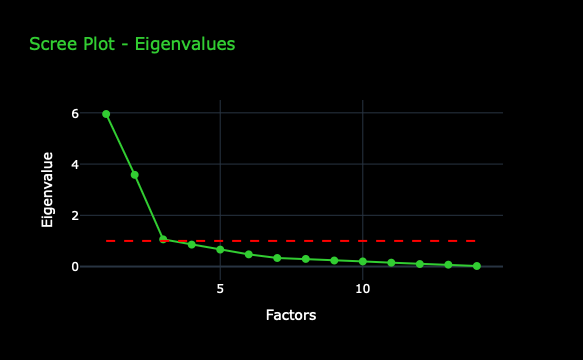

In [38]:
warnings.filterwarnings("ignore", category=FutureWarning)

#Determine number of factors (Eigenvalues)
fa = FactorAnalyzer(rotation=None)
fa.fit(data[num_cols])
ev, _ = fa.get_eigenvalues()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=list(range(1,len(ev)+1)), 
    y=ev, 
    mode='lines+markers',
    name='Eigenvalues',
    line=dict(color='limegreen'),
    marker=dict(color='limegreen', size=8)                     
))
fig.add_shape(
   type='line',
    x0=1, y0=1,
    x1=len(ev), y1=1,
    line=dict(color='red', width=2, dash='dash'),
    name='Eigenvalue = 1'
)  
fig.update_layout(
    title='Scree Plot - Eigenvalues',
    xaxis_title='Factors',
    yaxis_title='Eigenvalue',
    template='plotly_dark',
    title_font_color='limegreen',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.show()

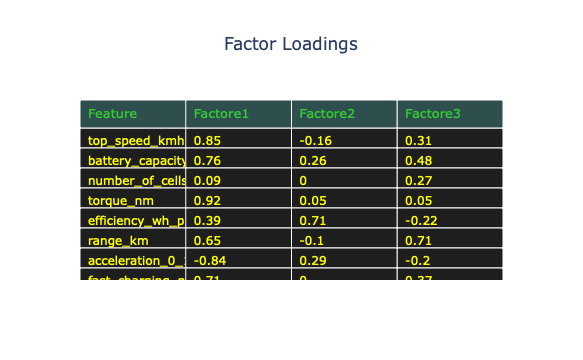

In [39]:
#Fit Factor Analysis (Varimax rotation)
fa_varimax = FactorAnalyzer(n_factors=3, rotation='varimax')
fa_varimax.fit(data[num_cols])

loadings = pd.DataFrame(
    fa_varimax.loadings_,
    index=num_cols,
    columns=[f'Factor{i+1}' for i in range(3)]
).round(2)

fig= go.Figure()
fig.add_trace(go.Table(
    header=dict(
        values=["Feature"] + [f'Factore{i+1}' for i in range(3)],
        fill_color='darkslategray',
        font=dict(color='limegreen', size=13),
        align='left'
    ),
    cells=dict(
        values=[loadings.index] + [loadings[c] for c in loadings.columns],
        fill_color='#1e1e1e',
        font=dict(color='yellow', size=12),
        align='left'
    )
))

fig.update_layout(title='Factor Loadings', title_x=0.5)
fig.show()

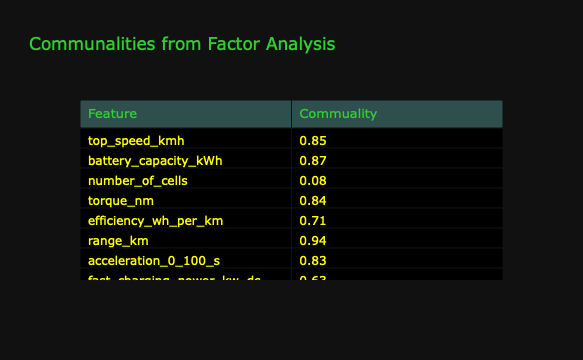

In [40]:
#Communalities
communalities = pd.DataFrame(fa_varimax.get_communalities(),
                            index=num_cols, 
                            columns=['Communality']).round(2)

fig = go.Figure()
fig.add_trace(go.Table(
    header=dict(
        values=['Feature', 'Commuality'],
        fill_color='darkslategray',
        font=dict(color='limegreen', size=13),
        align='left'
    ),
    cells=dict(
        values=[communalities.index, communalities['Communality']],
        fill_color='black',
        font=dict(color='yellow', size=12),
        align='left'
    )
))

fig.update_layout(title='Communalities from Factor Analysis', template='plotly_dark',
                  title_font_color='limegreen')
fig.show()


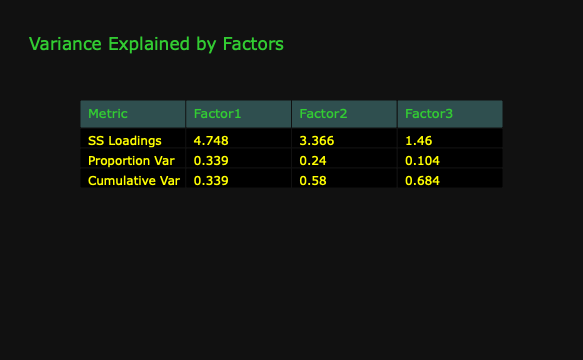

In [41]:
# Variance explained by Factors
variance = pd.DataFrame(
    fa_varimax.get_factor_variance(),
    index=['SS Loadings', 'Proportion Var', 'Cumulative Var'],
    columns=[f'Factor{i+1}' for i in range(3)]
).round(3)

fig = go.Figure()
fig.add_trace(go.Table(
    header=dict(
        values=['Metric'] + list(variance.columns),
        fill_color='darkslategray',
        font=dict(color='limegreen', size=13),
        align='left'
    ),
    cells=dict(
        values=[variance.index] + [variance[c] for c in variance.columns],
        fill_color='black',
        font=dict(color='yellow', size=12),
        align='left'
    )
))

fig.update_layout(
    title='Variance Explained by Factors', 
    template='plotly_dark',
    title_font_color='limegreen'
)
fig.show()

### Factor Scores and Cluster

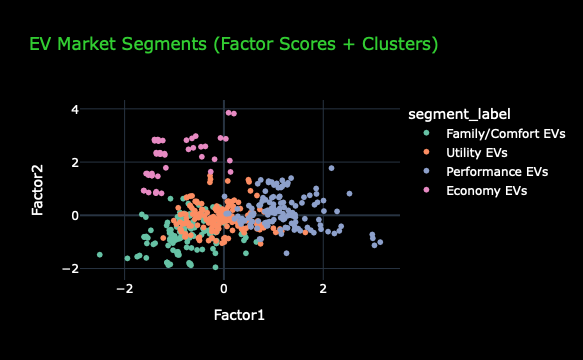

In [42]:
#Compute Factor Scores
factor_scores = pd.DataFrame(
    fa_varimax.transform(data[num_cols]),
    columns=[f'Factor{i+1}' for i in range(3)]
)
df_final = pd.concat([data[['brand','model']], factor_scores], axis=1)

#K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_final['cluster'] = kmeans.fit_predict(factor_scores)

cluster_labels = {
    0: 'Performance EVs',
    1: 'Family/Comfort EVs',
    2: 'Utility EVs',
    3: 'Economy EVs'
}

df_final['segment_label'] = df_final['cluster'].map(cluster_labels)

#Scatter plot (Factor1 vs Factor2)
fig = px.scatter(
    df_final,
    x='Factor1',
    y='Factor2',
    color='segment_label',
    hover_data=['brand', 'model'],
    title='EV Market Segments (Factor Scores + Clusters)',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_dark'
)
fig.update_layout(
    title_font_color='limegreen',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.show()

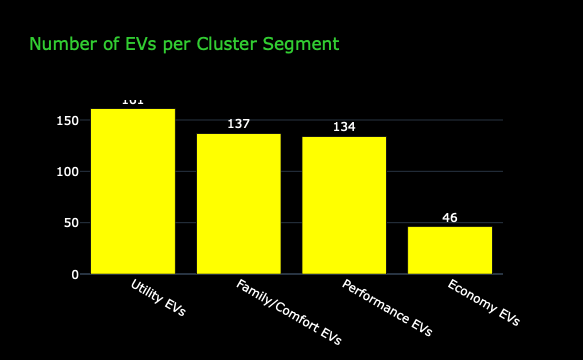

In [43]:
#Cluster counts
segment_counts = df_final['segment_label'].value_counts().sort_values(ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=segment_counts.index,
    y=segment_counts.values,
    marker=dict(color='yellow'),
    text=segment_counts.values,
    textposition='outside'
))

fig.update_layout(
    title='Number of EVs per Cluster Segment',
    template='plotly_dark',
    title_font_color='limegreen',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.show()

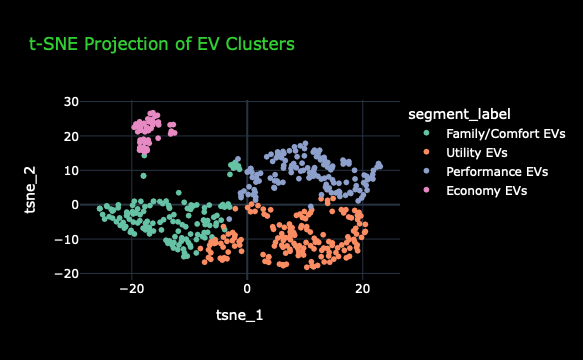

In [44]:
#t-SNE projection (visualize cluster separability)

X_embedded = TSNE(
    n_components=2,
    random_state=42
).fit_transform(factor_scores)
df_final['tsne_1'], df_final['tsne_2'] = X_embedded[:,0], X_embedded[:,1]

fig=px.scatter(
    df_final,
    x='tsne_1',
    y='tsne_2',
    color='segment_label',
    hover_data=['brand', 'model'],
    title='t-SNE Projection of EV Clusters',
    color_discrete_sequence=px.colors.qualitative.Set2,
    template='plotly_dark'
)
fig.update_layout(
    title_font_color='limegreen',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig.show()

`Notes`:
- The clusters appear clearly separated, indicating a strong underlying latent structure in the data.
- The “Performance” and “Economy” clusters show high internal cohesion, suggesting these groups are well-defined.
- In contrast, Utility EVs display greater variability, implying this segment covers a wider range of characteristics.
- The minimal overlap between clusters highlights the strong discriminative ability of the extracted factors.